# Viewing all the existiong files on our dataset

In [73]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('SignLanguage'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\american_sign_language.PNG
dataset\amer_sign2.png
dataset\amer_sign3.png
dataset\sign_mnist_test.csv
dataset\sign_mnist_train.csv
dataset\sign_mnist_test\sign_mnist_test.csv
dataset\sign_mnist_train\sign_mnist_train.csv


# Importing the desired libraries

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Visualizing the data

In [75]:
train_data = pd.read_csv('SignLanguage/sign_mnist_train/sign_mnist_train.csv')
test_data = pd.read_csv('SignLanguage/sign_mnist_test/sign_mnist_test.csv')

In [76]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


<AxesSubplot:xlabel='label', ylabel='count'>

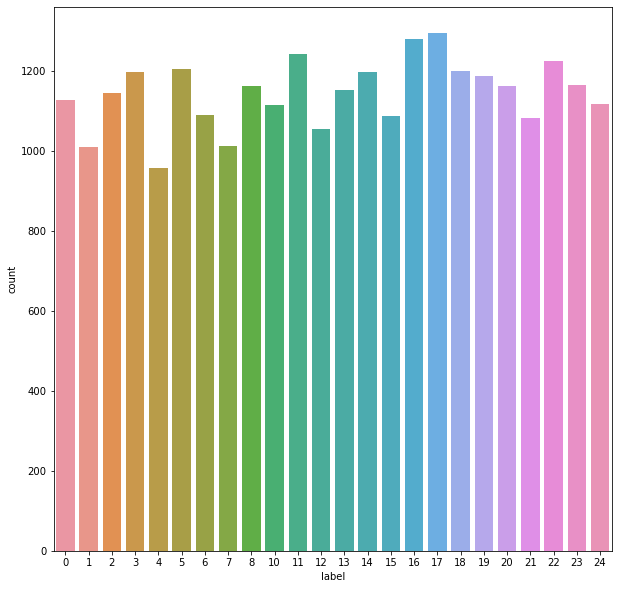

In [77]:
plt.figure(figsize=(10,10))
sns.countplot(data=train_data, x='label')

# Normalizing and Reshaping the data

In [78]:
y_train = train_data['label']
X_train = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1)
y_test = test_data['label']
X_test = test_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [79]:
labels = y_train.unique().tolist()
labels.sort()
labels

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [80]:
classes = []
for label in labels:
    classes.append(chr(label + 65))
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

# Let's view some of the actual images

Images from the training set

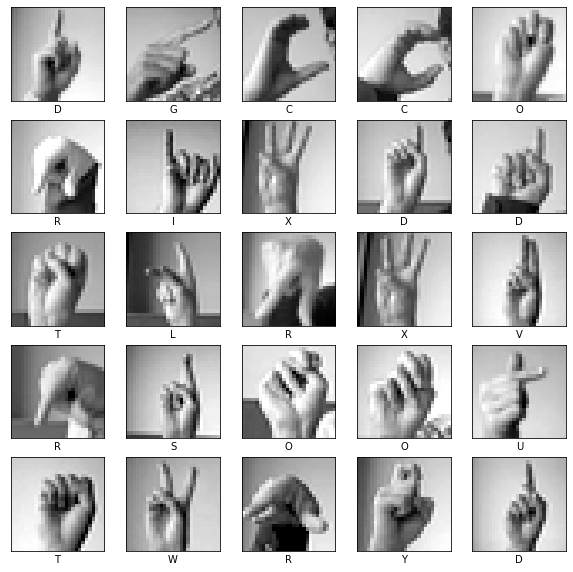

In [81]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(classes[y_train[i]])
plt.show()

Images from testing set

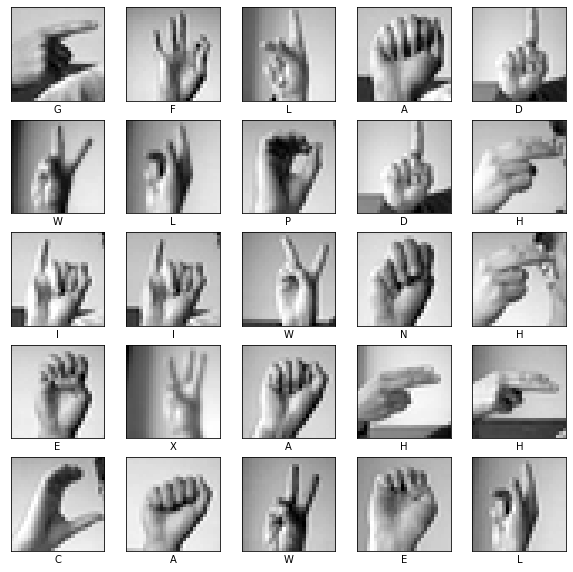

In [82]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap='gray')
    plt.xlabel(classes[y_test[i]])
plt.show()

# Binarizing the labels

In [83]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit(y_train)
y_train_binarized = lb.transform(y_train)
y_test_binarized = lb.transform(y_test)

In [84]:
y_train_binarized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [85]:
y_train_binarized.shape

(27455, 24)

# Let's build the model

We'll build a Convolutional Neural Network architecture for this

In [86]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')
])

In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

# Training the model

In [88]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train_binarized, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
172/172 [==============================] - 11s 47ms/step - loss: 1.9668 - accuracy: 0.4259 - val_loss: 0.8060 - val_accuracy: 0.7647
Epoch 2/20
172/172 [==============================] - 8s 44ms/step - loss: 0.5244 - accuracy: 0.8465 - val_loss: 0.3109 - val_accuracy: 0.9097
Epoch 3/20
172/172 [==============================] - 13s 74ms/step - loss: 0.1957 - accuracy: 0.9521 - val_loss: 0.1024 - val_accuracy: 0.9842
Epoch 4/20
172/172 [==============================] - 11s 66ms/step - loss: 0.0693 - accuracy: 0.9916 - val_loss: 0.0397 - val_accuracy: 0.9976
Epoch 5/20
172/172 [==============================] - 13s 75ms/step - loss: 0.0272 - accuracy: 0.9992 - val_loss: 0.0188 - val_accuracy: 0.9995
Epoch 6/20
172/172 [==============================] - 14s 82ms/step - loss: 0.0137 - accuracy: 0.9998 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 7/20
172/172 [==============================] - 15s 85ms/step - loss: 0.0088 - accuracy: 0.9998 - val_loss: 0.0065 - val_accuracy: 

# Let's evaluate the model's performance

In [89]:
model.evaluate(X_test, y_test_binarized)

225/225 [==============================] - 3s 13ms/step - loss: 0.4703 - accuracy: 0.9126


[0.47026509046554565, 0.9125766754150391]

# Let's plot the graphs that define the change in accuracy and loss while training

225/225 - 3s - loss: 0.4703 - accuracy: 0.9126 - 3s/epoch - 13ms/step


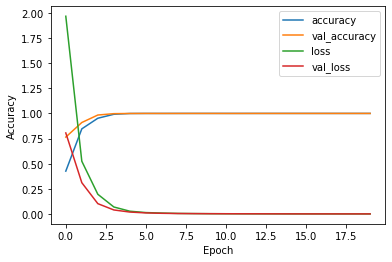

In [90]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test, y_test_binarized, verbose=2)

In [91]:
print(f'Test accuracy is {test_acc * 100:.2f}%')

Test accuracy is 91.26%


# Running the cell below to get the prediction for a random Sign Language

1/1 [==============================] - 0s 47ms/step


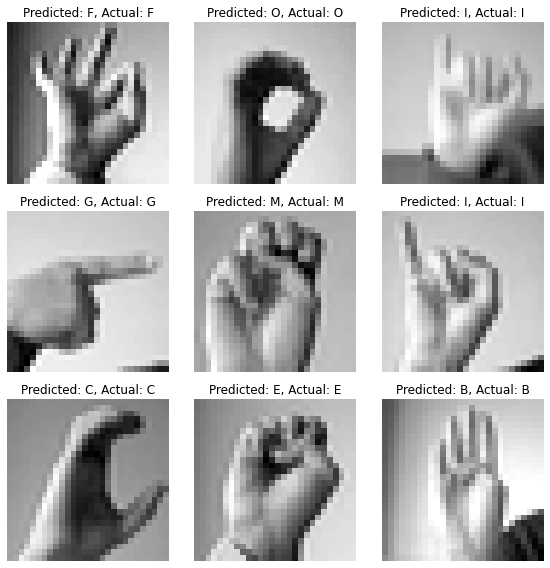

In [93]:
num_images = 6
grid_size = int(np.ceil(np.sqrt(num_images)))

fig, axes = plt.subplots(grid_size, grid_size, figsize=(8, 8))

for i, ax in enumerate(axes.flatten()):
    rand_idx = np.random.randint(0, len(X_test))
    image = X_test[rand_idx]
    label = y_test[rand_idx]

    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_class = np.argmax(prediction)

    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f'Predicted: {classes[predicted_class]}, Actual: {classes[label] if label < 9 else classes[label - 1]}')
    ax.axis('off')

plt.tight_layout()
plt.show()